In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [40]:
df = pd.read_csv('/Users/hinatran/Downloads/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv')
df.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227965 entries, 0 to 3227964
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     int64  
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECIVABLE               float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    float64
 15  CNT_DRAWINGS_CURRENT        int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  float64
 17  CNT_DRAWINGS_POS_CURRENT    float64
 18  CNT_INSTALMENT_MATURE_CUM   float64
 19  NAME_CONTRACT_STATUS 

In [42]:
df.isnull().sum()

SK_ID_PREV                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      605754
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    605754
AMT_DRAWINGS_POS_CURRENT      605754
AMT_INST_MIN_REGULARITY       264384
AMT_PAYMENT_CURRENT           620093
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      605754
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    605754
CNT_DRAWINGS_POS_CURRENT      605754
CNT_INSTALMENT_MATURE_CUM     264384
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
SK_ID_CURR                         0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
def snake_case_columns(columns):
    return [col.strip().replace(" ", "_") for col in columns]

df.columns = snake_case_columns(df.columns)
df.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788


In [45]:
df.rename(columns={"AMT_RECIVABLE": "AMT_RECEIVABLE",
                   'CNT_INSTALMENT_MATURE_CUM':'CNT_INSTALLMENT_MATURE_CUM'}, inplace=True)

In [46]:
df.columns

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECEIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALLMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF', 'SK_ID_CURR'],
      dtype='object')

In [47]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)

df.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALLMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788


In [48]:
df[['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALLMENT_MATURE_CUM']] = df[['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALLMENT_MATURE_CUM']].astype('Int64')
df['AMT_CREDIT_LIMIT_ACTUAL'] = df['AMT_CREDIT_LIMIT_ACTUAL'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227965 entries, 0 to 3227964
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     float64
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECEIVABLE              float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    Int64  
 15  CNT_DRAWINGS_CURRENT        Int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  Int64  
 17  CNT_DRAWINGS_POS_CURRENT    Int64  
 18  CNT_INSTALLMENT_MATURE_CUM  Int64  
 19  NAME_CONTRACT_STATUS 

In [49]:
columns_with_spaces = [col for col in df.columns if ' ' in col]
print(columns_with_spaces)

[]


In [50]:
df.describe()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECEIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALLMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,SK_ID_CURR
count,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,2.622211e+06,3.227965e+06,2.622211e+06,2.622211e+06,2.963581e+06,2.607872e+06,...,3.227965e+06,3.227965e+06,2622211.0,3227965.0,2622211.0,2622211.0,2963581.0,3.227965e+06,3.227965e+06,3.227965e+06
mean,1.903894e+06,-3.471544e+01,5.907332e+04,1.529536e+05,6.024272e+03,7.494084e+03,2.984882e+02,2.884152e+03,3.599681e+03,1.023861e+04,...,5.886264e+04,5.887259e+04,0.315021,0.701144,0.004989,0.543105,21.088831,9.494803e+00,2.857060e-01,1.536542e+05
std,5.367415e+05,2.663609e+01,1.066137e+05,1.637092e+05,2.842116e+04,3.396743e+04,8.396193e+03,2.038833e+04,5.611742e+03,3.586433e+04,...,1.062747e+05,1.062813e+05,1.112726,3.171833,0.084085,3.19304,19.987301,9.805148e+01,1.957034e+01,8.857121e+04
min,1.000018e+06,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.202502e+05,-4.202502e+05,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.431613e+06,-5.600000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.557000e+02,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,5.0,0.000000e+00,0.000000e+00,7.690500e+04
50%,1.896076e+06,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.923020e+03,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,16.0,0.000000e+00,0.000000e+00,1.532070e+05
75%,2.369259e+06,-1.100000e+01,9.040554e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.750000e+03,9.000000e+03,...,9.020840e+04,9.022635e+04,0.0,0.0,0.0,0.0,33.0,0.000000e+00,0.000000e+00,2.300480e+05
max,2.843493e+06,-1.000000e+00,1.354829e+06,1.350000e+06,2.115000e+06,2.115000e+06,1.529847e+06,2.060030e+06,2.028820e+05,4.289207e+06,...,1.354829e+06,1.354829e+06,51.0,165.0,12.0,165.0,120.0,2.831000e+03,2.800000e+03,3.075090e+05


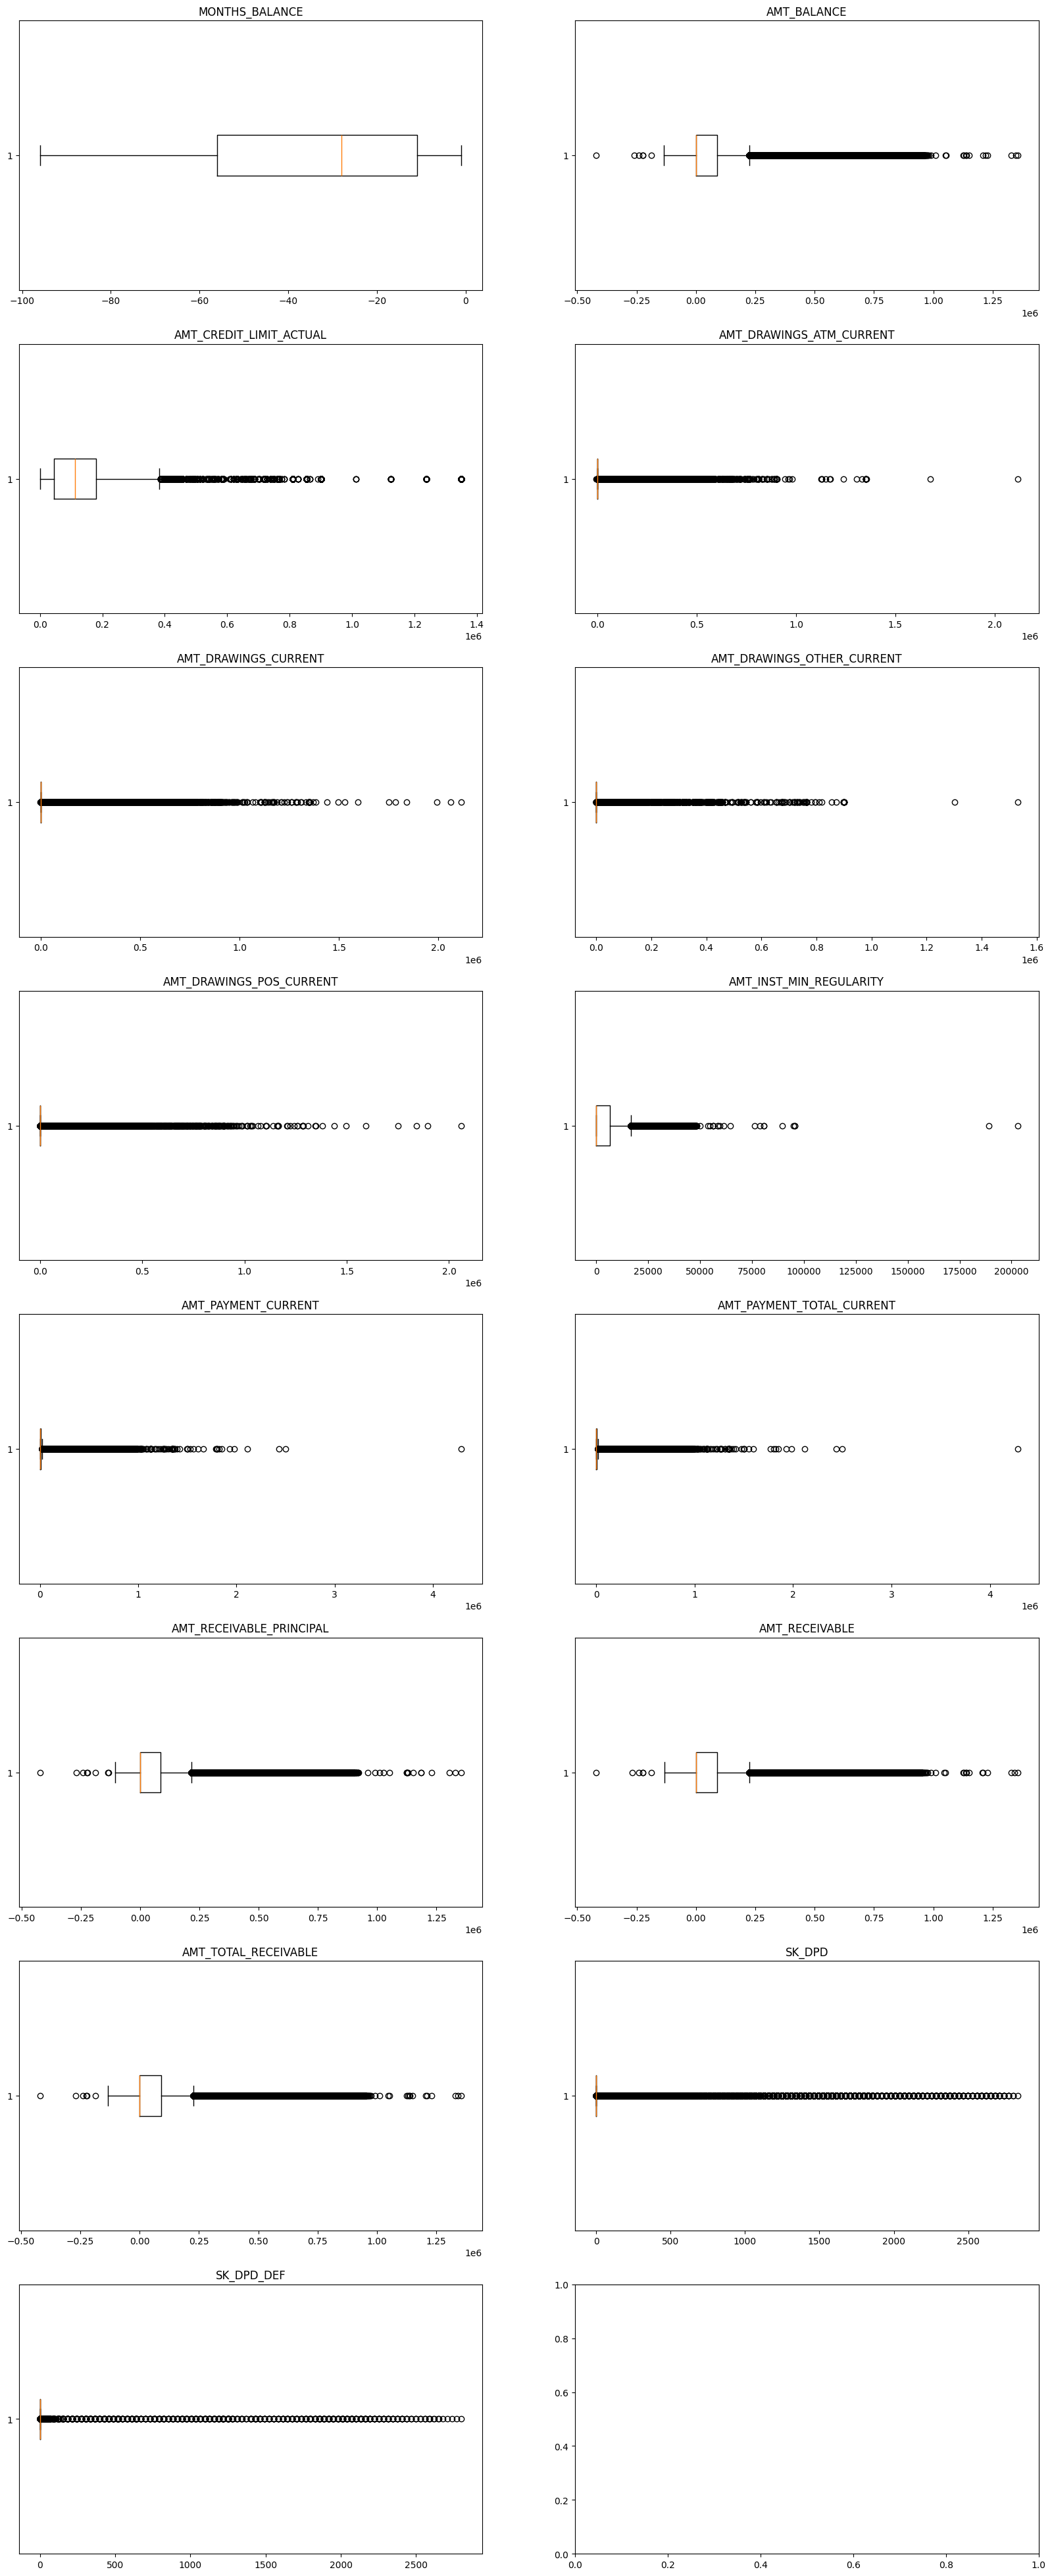

In [51]:
columns = ['MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECEIVABLE', 'AMT_TOTAL_RECEIVABLE', 'SK_DPD',
       'SK_DPD_DEF']
fig, axes = plt.subplots(nrows = math.ceil(len(columns) / 2), ncols = 2, figsize=(20, 50))
axes = axes.flatten()
for i, col in enumerate(columns):
    if i < len(columns):
        without_null = df[~df[col].isnull()][col]
        axes[i].boxplot(without_null, vert = False)
        axes[i].set_title(col)
    else:
        break

In [52]:
# Create a function to remove outlier   
def find_outliers(data, whisker_coeff = 1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)                
    IQR = Q3 - Q1                                   
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

class RemoveOuliers():
    def __init__(self, whisker_coeff = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None
    def fit(self, X: pd.Series):
        self.lower, self.upper = find_outliers(X, self.whisker)
    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [53]:
# remove outliers in each columns
for col in ['MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECEIVABLE', 'AMT_TOTAL_RECEIVABLE']:
    if df[col].dtype != 'object':
        remove = RemoveOuliers()
        remove.fit(df[col])
        df[col] = remove.transform(df[col])

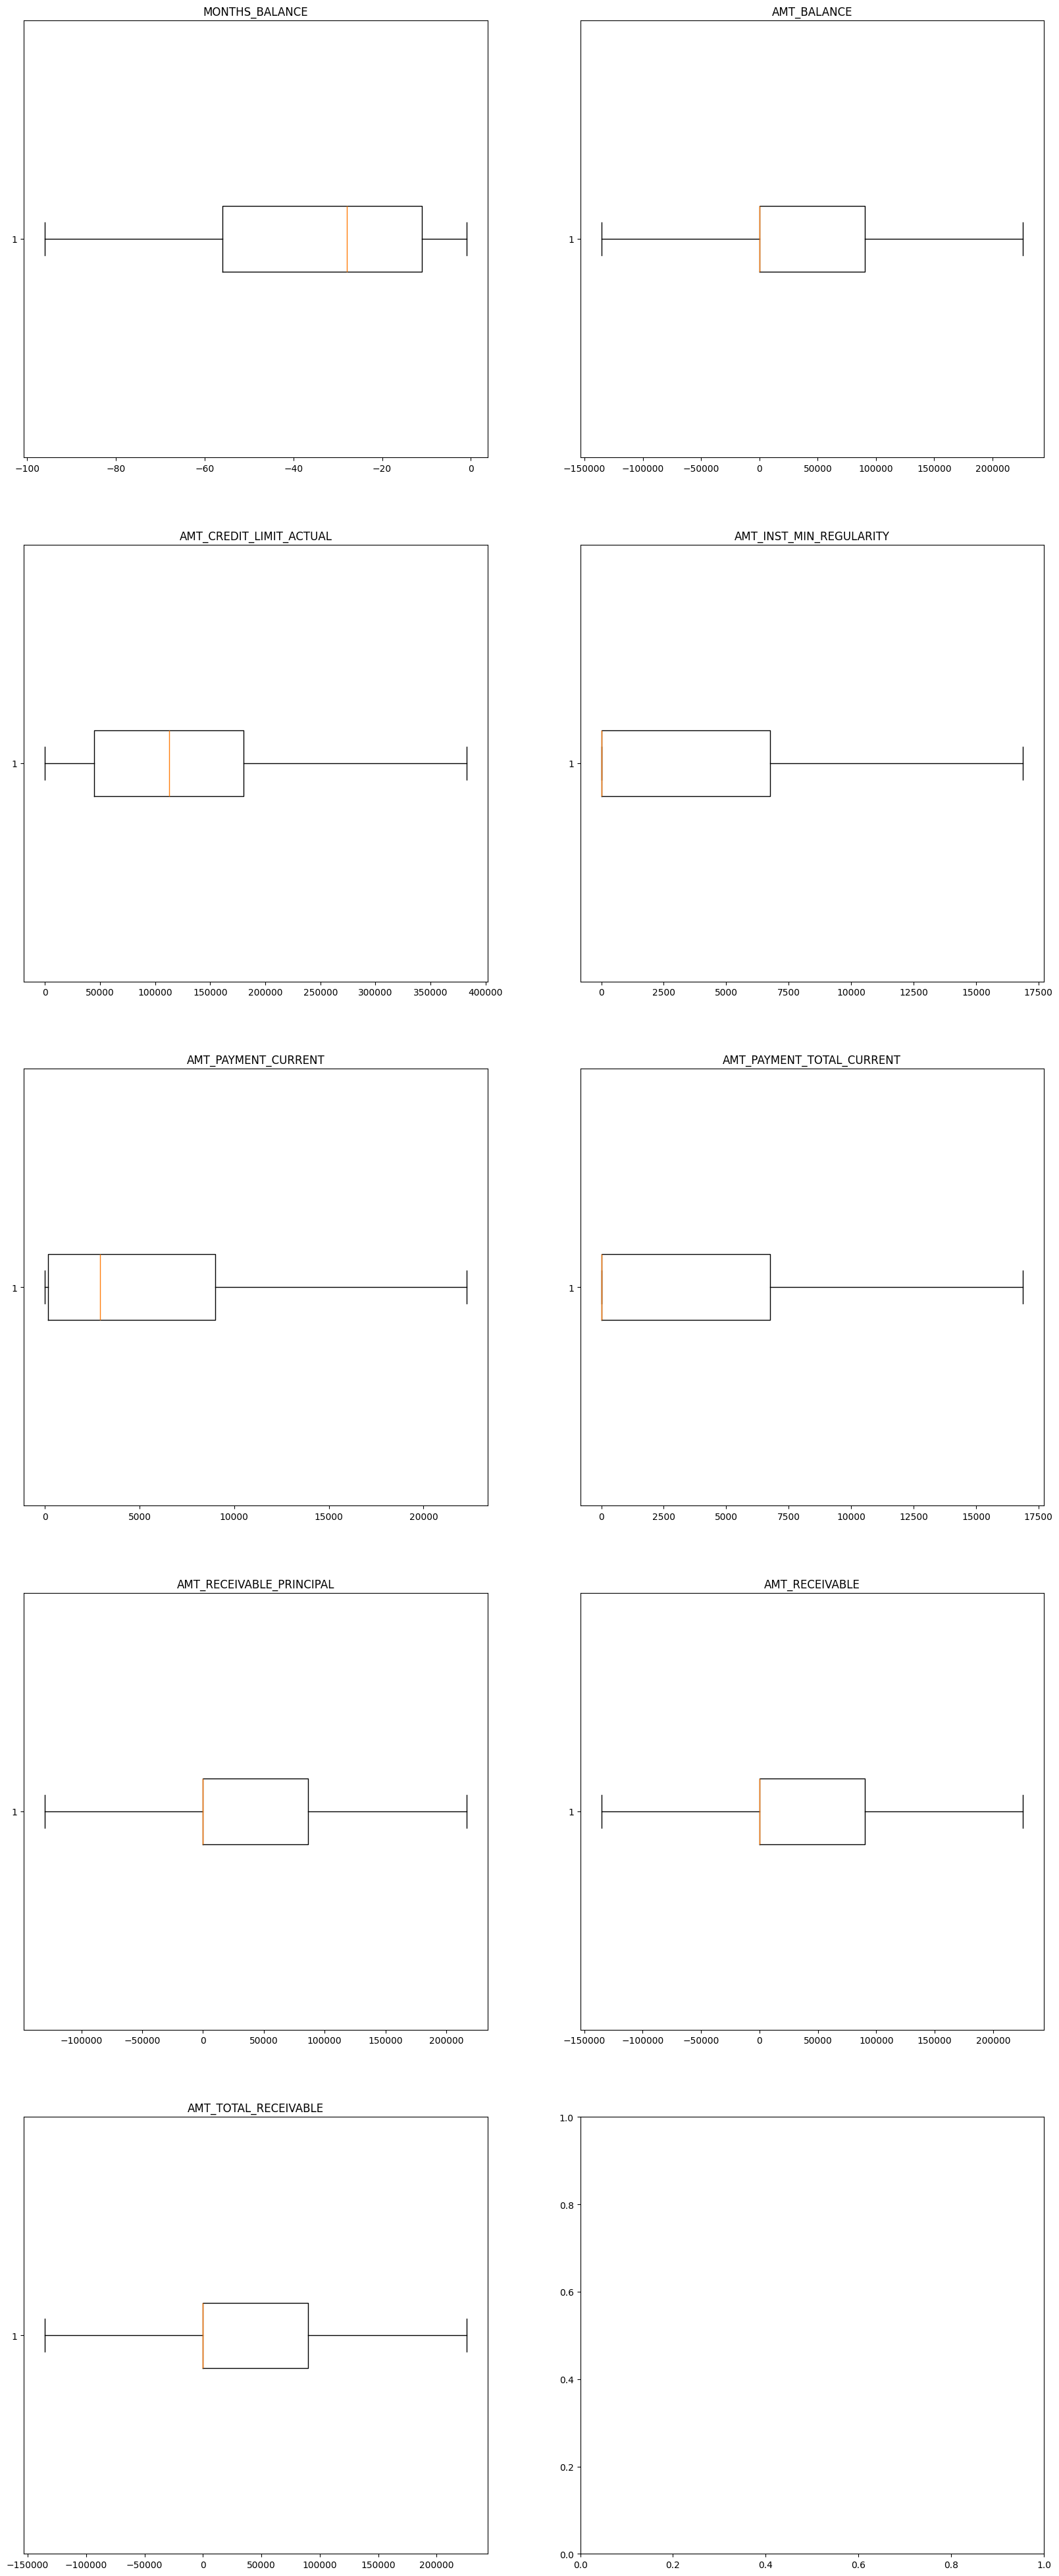

In [54]:
#Redraw boxplot after remove outliers
columns = ['MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECEIVABLE', 'AMT_TOTAL_RECEIVABLE']
fig, axes = plt.subplots(nrows = math.ceil(len(columns) / 2), ncols = 2, figsize=(20, 50))
axes = axes.flatten()
for i, col in enumerate(columns):
    if i < len(columns):
        without_null = df[~df[col].isnull()][col]
        axes[i].boxplot(without_null, vert = False)
        axes[i].set_title(col)
    else:
        break

In [55]:
df.isnull().sum()

SK_ID_PREV                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      605754
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    605754
AMT_DRAWINGS_POS_CURRENT      605754
AMT_INST_MIN_REGULARITY       264384
AMT_PAYMENT_CURRENT           620093
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECEIVABLE                     0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      605754
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    605754
CNT_DRAWINGS_POS_CURRENT      605754
CNT_INSTALLMENT_MATURE_CUM    264384
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
SK_ID_CURR                         0
dtype: int64

In [56]:
df[['AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','AMT_INST_MIN_REGULARITY','AMT_PAYMENT_CURRENT']] = df[['AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','AMT_INST_MIN_REGULARITY','AMT_PAYMENT_CURRENT']].fillna(df[['AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','AMT_INST_MIN_REGULARITY','AMT_PAYMENT_CURRENT']].mean())
df[['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALLMENT_MATURE_CUM']] = df[['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALLMENT_MATURE_CUM']].fillna(df[['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALLMENT_MATURE_CUM']].median())

In [57]:
df

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALLMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000.0,2250.000000,2250.0,0.000000,0.000000,2250.0,2250.000000,...,64875.555,1,1,0,0,69,Active,0,0,87788
1,2582071,-82,16809.210,67500.0,0.000000,0.0,0.000000,0.000000,3375.0,9000.000000,...,16809.210,0,0,0,0,18,Active,0,0,87788
2,2582071,-84,27577.890,67500.0,0.000000,0.0,0.000000,0.000000,3375.0,4500.000000,...,27577.890,0,0,0,0,16,Active,0,0,87788
3,2582071,-7,65159.235,45000.0,0.000000,0.0,0.000000,0.000000,2250.0,2250.000000,...,65609.235,0,0,0,0,63,Active,0,0,87788
4,2582071,-59,70475.850,67500.0,24750.000000,24750.0,0.000000,0.000000,3375.0,4500.000000,...,70475.850,4,4,0,0,41,Active,0,0,87788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1551072,-1,0.000,202500.0,6024.271604,0.0,298.488248,2884.152156,0.0,5795.200245,...,0.000,0,0,0,0,0,Active,0,0,259579
3227961,2339982,-1,0.000,45000.0,0.000000,0.0,0.000000,0.000000,0.0,5795.200245,...,0.000,0,0,0,0,0,Active,0,0,220697
3227962,2720102,-1,0.000,225000.0,6024.271604,0.0,298.488248,2884.152156,0.0,5795.200245,...,0.000,0,0,0,0,0,Active,0,0,93573
3227963,1897864,-2,0.000,270000.0,6024.271604,0.0,298.488248,2884.152156,0.0,5795.200245,...,0.000,0,0,0,0,0,Active,0,0,11072


In [58]:
df.describe()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECEIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALLMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,SK_ID_CURR
count,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,...,3.227965e+06,3.227965e+06,3227965.0,3227965.0,3227965.0,3227965.0,3227965.0,3.227965e+06,3.227965e+06,3.227965e+06
mean,1.903894e+06,-3.471544e+01,4.966268e+04,1.360290e+05,6.024272e+03,7.494084e+03,2.984882e+02,2.884152e+03,3.353162e+03,5.795200e+03,...,4.950984e+04,4.952148e+04,0.255905,0.701144,0.004052,0.441187,20.672034,9.494803e+00,2.857060e-01,1.536542e+05
std,5.367415e+05,2.663609e+01,7.382794e+04,1.157870e+05,2.561600e+04,3.396743e+04,7.567489e+03,1.837600e+04,4.463859e+03,6.345016e+03,...,7.370727e+04,7.372056e+04,1.010414,3.171833,0.075811,2.885689,19.202067,9.805148e+01,1.957034e+01,8.857121e+04
min,1.000018e+06,-9.600000e+01,-1.356083e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.353126e+05,-1.353395e+05,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.431613e+06,-5.600000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.481300e+02,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,5.0,0.000000e+00,0.000000e+00,7.690500e+04
50%,1.896076e+06,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.750000e+01,5.795200e+03,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,16.0,0.000000e+00,0.000000e+00,1.532070e+05
75%,2.369259e+06,-1.100000e+01,9.040554e+04,1.800000e+05,6.024272e+03,0.000000e+00,0.000000e+00,1.378800e+03,5.625000e+03,8.100000e+03,...,9.020840e+04,9.022635e+04,0.0,0.0,0.0,0.0,31.0,0.000000e+00,0.000000e+00,2.300480e+05
max,2.843493e+06,-1.000000e+00,2.260138e+05,3.825000e+05,2.115000e+06,2.115000e+06,1.529847e+06,2.060030e+06,1.687500e+04,2.226645e+04,...,2.255210e+05,2.255659e+05,51.0,165.0,12.0,165.0,120.0,2.831000e+03,2.800000e+03,3.075090e+05
